#CE6670 Course Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Data from CSV File

In [3]:
path = '/content/drive/MyDrive/Camels Aus Data/Streamflow Time series/03_streamflow/streamflow_MLd.csv'
df = pd.read_csv(path)
df.head()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,1951,1,1,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,92.6120,-99.99,-99.99,-99.99,213.759
1,1951,1,2,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,87.6400,-99.99,-99.99,-99.99,144.897
2,1951,1,3,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,79.5119,-99.99,-99.99,-99.99,128.456
3,1951,1,4,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,82.7683,-99.99,-99.99,-99.99,117.354
4,1951,1,5,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,89.2553,-99.99,-99.99,-99.99,115.843


In [4]:
df.shape

(23376, 225)

### Extraction of Annual Maximum values of Streamflows for all the stations

In [5]:
AMS = df.groupby(['year']).max()

In [6]:
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,1739.73,-99.99,-99.99,-99.99,5680.29
1952,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,4638.20,-99.99,-99.99,-99.99,8961.76
1953,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,43627.30,-99.99,2828.89,-99.99,-99.99,-99.99,3275.36
1954,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,52593.50,-99.99,2266.80,-99.99,-99.99,-99.99,6505.59
1955,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,36368.90,-99.99,3336.16,-99.99,-99.99,-99.99,4294.40


In [7]:
AMS.shape

(64, 224)

### Extracting the Stations Ids from the column names

In [8]:
column_names_array = AMS.columns[2:].tolist()
n_stations = len(column_names_array)

### Replacing the Missing values with NaN

In [9]:
AMS.replace(-99.99, np.nan, inplace=True)
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1739.73,NaN,NaN,NaN,5680.29
1952,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4638.20,NaN,NaN,NaN,8961.76
1953,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43627.3,NaN,2828.89,NaN,NaN,NaN,3275.36
1954,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52593.5,NaN,2266.80,NaN,NaN,NaN,6505.59
1955,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36368.9,NaN,3336.16,NaN,NaN,NaN,4294.40


In [10]:
AMS.iloc[10:,:].head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1961,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27780.6,NaN,2367.32,NaN,NaN,NaN,2464.22
1962,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58355.4,NaN,3779.90,NaN,NaN,271.59,4042.59
1963,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28588.3,NaN,2381.91,12035.60,NaN,11718.90,3749.96
1964,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34594.7,28868.0,NaN,2524.14,17075.60,NaN,12430.30,6741.83
1965,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3723.39,NaN,29406.9,29664.7,NaN,2101.55,8096.15,NaN,14173.90,2456.47


### Calculating the Percentage of NaN values for different Time Periods

In [11]:
import pandas as pd

percent = [10,20,30,40,50]
percent_of_stations = []
percent_nans_for_timeP = []
years = [4,14,24,34,44]

for y in years:
  nan_percent = AMS.iloc[y:,2:].isnull().mean() * 100
  for p in percent:
    stations_with_over_p_percent_nan = nan_percent[nan_percent > p]
    percent_of_stations.append(len(stations_with_over_p_percent_nan)/222*100)
  percent_nans_for_timeP.append(percent_of_stations)
  percent_of_stations = []


df = pd.DataFrame(percent_nans_for_timeP, columns=percent, index=years)
new_row_names = [60,50,40,30,20]
df.index = new_row_names
df = df.round(1)
print("The percentage NaN values for different time periods are as follows:")
df

The percentage NaN values for different time periods are as follows:


,10,20,30,40,50
60,75.2,55.0,18.9,2.7,0.0
50,35.6,9.0,2.3,0.0,0.0
40,4.5,1.4,0.5,0.0,0.0
30,5.0,2.3,0.9,0.5,0.0
20,5.4,2.7,2.3,0.9,0.5


### Slicing the AMS dataframe for the data of 40 years and Filling the missing values

In [12]:
AMS_without_null = AMS.iloc[24:,2:]
# print(AMS_without_null)
AMS_without_null = AMS_without_null.ffill().bfill()
AMS_without_null = AMS_without_null.interpolate(method='linear', axis=0)
# print("Original DataFrame:")
# print(AMS_without_null)

In [13]:
print(AMS_without_null.shape)
AMS_without_null.head()

(40, 222)


,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,188.75,3905.36,17631.30,7641.13,27528.40,5963.62
1976,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,188.75,2391.66,8264.41,6281.46,12217.50,2382.45
1977,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,188.75,1314.88,9453.75,5398.26,9590.17,3631.31
1978,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,188.75,1177.38,9292.47,6505.36,7827.53,3956.38
1979,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,188.75,1553.18,15041.90,8523.38,9892.23,3149.38


### Converting the Streamflow unit to cubic metres / second

In [14]:
AMS_without_null = AMS_without_null.mul(0.011574)
AMS_without_null.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,1989.408564,1798.773210,82.780489,53.167831,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,...,105.706499,10.947117,541.483803,702.487402,2.184592,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1494.469602,1195.999290,63.181077,81.475983,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,...,22.691637,5.454757,400.551835,567.257944,2.184592,27.681073,95.652281,72.701618,141.405345,27.574476
1977,1709.873316,2098.678698,34.213670,19.029161,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,...,24.233873,4.964413,282.017871,336.861270,2.184592,15.218421,109.417702,62.479461,110.996628,42.028782
1978,294.750428,374.836721,5.595450,10.358394,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,...,16.011819,3.990414,441.044631,287.486586,2.184592,13.626996,107.551048,75.293037,90.595832,45.791142
1979,949.559895,1026.963335,63.547278,153.148325,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,...,21.015838,1.491287,398.660643,381.880658,2.184592,17.976505,174.094951,98.649600,114.492670,36.450924


### PymannKendall test for detecting the trend in the data.

In [15]:
!pip install pymannkendall

In [16]:
import pymannkendall as mk
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 186
The number of stations with trend in the Annual Maximum Series is 36


In [17]:
AMS_without_null.shape

(40, 222)

In [18]:
AMS_without_null['308799']

year
1975      2.184592
1976      2.184592
1977      2.184592
1978      2.184592
1979      2.184592
1980      2.184592
1981    124.824433
1982    178.171313
1983     90.957288
1984    187.391162
1985    106.685776
1986    128.388067
1987    152.736291
1988    156.798765
1989     79.287918
1990    168.090359
1991    196.822814
1992    113.174970
1993    128.405428
1994    218.665267
1995    223.491625
1996    188.932819
1997    168.917900
1998     96.660377
1999    150.718943
2000    141.683121
2001    207.064647
2002    161.395958
2003    115.944860
2004    209.955832
2005    143.175010
2006     99.852486
2007    286.634740
2008    114.712692
2009    189.014994
2010    113.350548
2011    158.355468
2012    107.696996
2013    145.370597
2014    118.027022
Name: 308799, dtype: float64

In [19]:
print(f"Station ids with trend are: {trend_station_id}")

Station ids with trend are: ['405205', '405238', '406208', '406213', '406214', '407214', '407215', '407220', '407230', '408200', '408202', '410061', '410734', '415207', '415226', '105102A', '138009A', 'A5040517', '215002', '216002', '216004', '230210', '231213', '236213', 'A2390519', '606185', '607155', '613002', '613146', '614044', '616002', '616065', '803003', 'G8110016', 'G8140040', '308799']


### Detrending the stations having a trend

In [20]:
from scipy import signal
for name in trend_station_id:
  AMS_without_null[name] = signal.detrend(AMS_without_null[name], axis=0, type='linear', bp=0)

In [21]:
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 218
The number of stations with trend in the Annual Maximum Series is 4


### Stations that still have trend

In [22]:
print(f"Station ids with trend are: {trend_station_id}")

Station ids with trend are: ['215002', '216002', '236213', '803003']


In [23]:
AMS_without_null.drop(columns = trend_station_id, inplace=True)

In [24]:
AMS_nonull_detrended = AMS_without_null
AMS_nonull_detrended.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,1989.408564,1798.773210,82.780489,53.167831,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,...,105.706499,10.947117,541.483803,702.487402,-68.764032,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1494.469602,1195.999290,63.181077,81.475983,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,...,22.691637,5.454757,400.551835,567.257944,-71.772390,27.681073,95.652281,72.701618,141.405345,27.574476
1977,1709.873316,2098.678698,34.213670,19.029161,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,...,24.233873,4.964413,282.017871,336.861270,-74.780748,15.218421,109.417702,62.479461,110.996628,42.028782
1978,294.750428,374.836721,5.595450,10.358394,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,...,16.011819,3.990414,441.044631,287.486586,-77.789105,13.626996,107.551048,75.293037,90.595832,45.791142
1979,949.559895,1026.963335,63.547278,153.148325,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,...,21.015838,1.491287,398.660643,381.880658,-80.797463,17.976505,174.094951,98.649600,114.492670,36.450924


In [25]:
AMS_nonull_detrended.shape

(40, 218)

### Extracting the column names of detrended time series

In [26]:
column_names_array_new = AMS_nonull_detrended.columns[:].tolist()

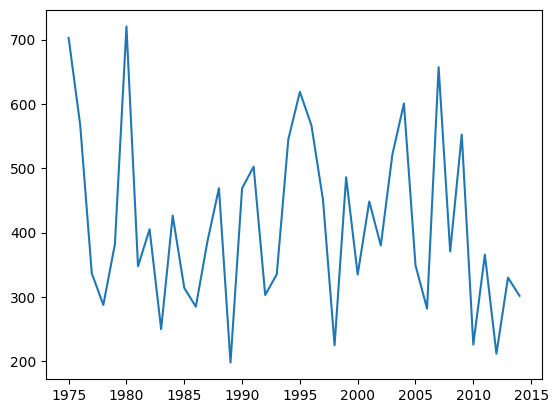

In [27]:
from matplotlib import pyplot as plt
plt.plot(AMS.index[24:],AMS_nonull_detrended['308145'])

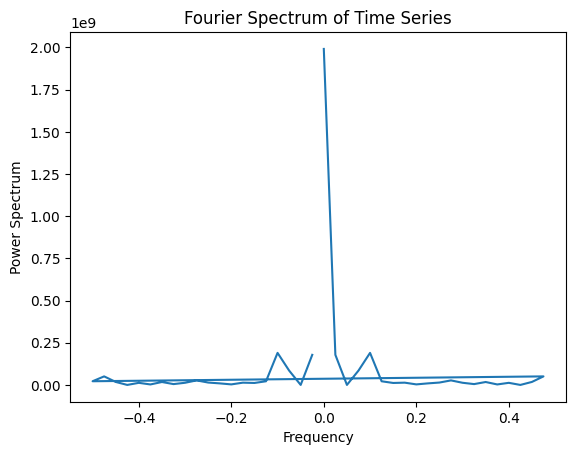

In [28]:
fft_result = np.fft.fft(AMS_nonull_detrended['919309A'])
power_spectrum = np.abs(fft_result)**2
frequencies = np.fft.fftfreq(len(AMS_nonull_detrended['919309A']))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Fourier Spectrum of Time Series')
plt.show()

### Augmented-Dickey-Fuller ADF test for testing the stationarity of time series at each station

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    result = adfuller(ts)

    adf_statistic = result[0]
    p_value = result[1]

    significance_levels = {
        1: 0.01,
        5: 0.05,
        10: 0.1
    }

    # print(f'ADF Statistic: {adf_statistic}')
    # print(f'p-value: {p_value}')

    for level, significance_level in significance_levels.items():
        if p_value < significance_level:
            # print(f'Null hypothesis rejected at {level}% significance level. Series is stationary.')
            return 1
    else:
        # print('Failed to reject null hypothesis. Series may be non-stationary.')
      return 0

In [30]:
num_stationary_stations = 0
non_stationary_stations = []
stationary_stations = []
for name in column_names_array_new:
  if(test_stationarity(AMS_nonull_detrended[name])==1):
    num_stationary_stations = num_stationary_stations + 1
    stationary_stations.append(name)
  else:
    non_stationary_stations.append(name)

print(stationary_stations)
print(num_stationary_stations)
print(non_stationary_stations)
print(len(non_stationary_stations))

['912105A', '915011A', '919003A', '919201A', '919309A', '922101B', '925001A', '926002A', 'G9030124', 'G9030250', 'G9070142', 'A0020101', 'A0030501', 'G0010005', 'G0050115', 'G0060005', '401009', '401012', '401015', '401203', '401208', '401210', '401212', '401216', '401217', '402204', '402206', '402213', '402217', '403209A', '403213A', '403214', '403217', '403226', '403232', '404207', '405205', '405209', '405215', '405217', '405218', '405219', '405226', '405238', '405245', '405248', '405251', '405263', '405274', '406208', '406213', '406214', '406224', '407214', '407215', '407220', '407230', '407253', '408200', '408202', '410057', '410061', '410705', '410730', '410731', '410734', '410761', '412028', '412050', '412066', '415207', '415226', '415237', '416003', '416008', '418005', '418014', '419005', '422202B', '422313B', '422319B', '422334A', '422394A', '424002', '424201A', '102101A', '104001A', '105101A', '105102A', '105105A', '107001B', '108002A', '108003A', '112002A', '112102A', '113004

### Time series plot of a stationary time series from a gauging stations

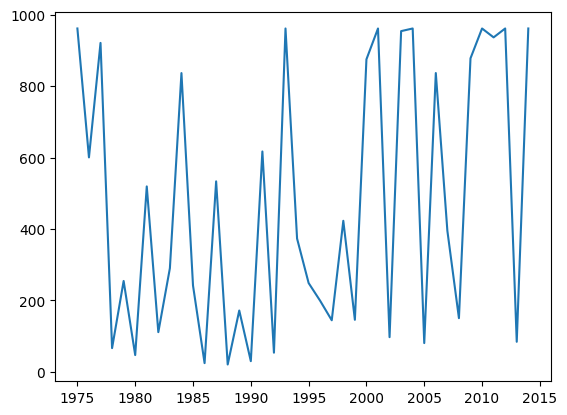

In [31]:
plt.plot(AMS.index[24:],AMS_nonull_detrended['G9070142'])

### Time series plot of a non stationary time series from a gauging stations

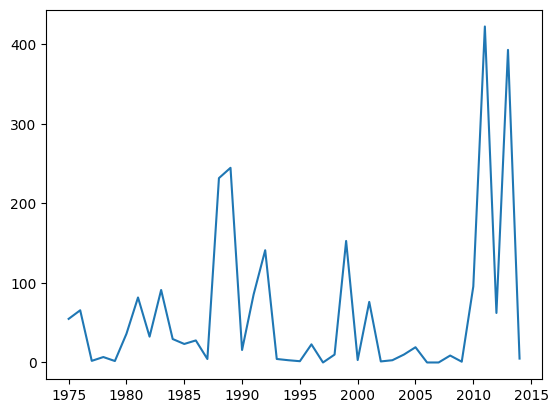

In [32]:
plt.plot(AMS.index[24:],AMS_nonull_detrended['138010A'])

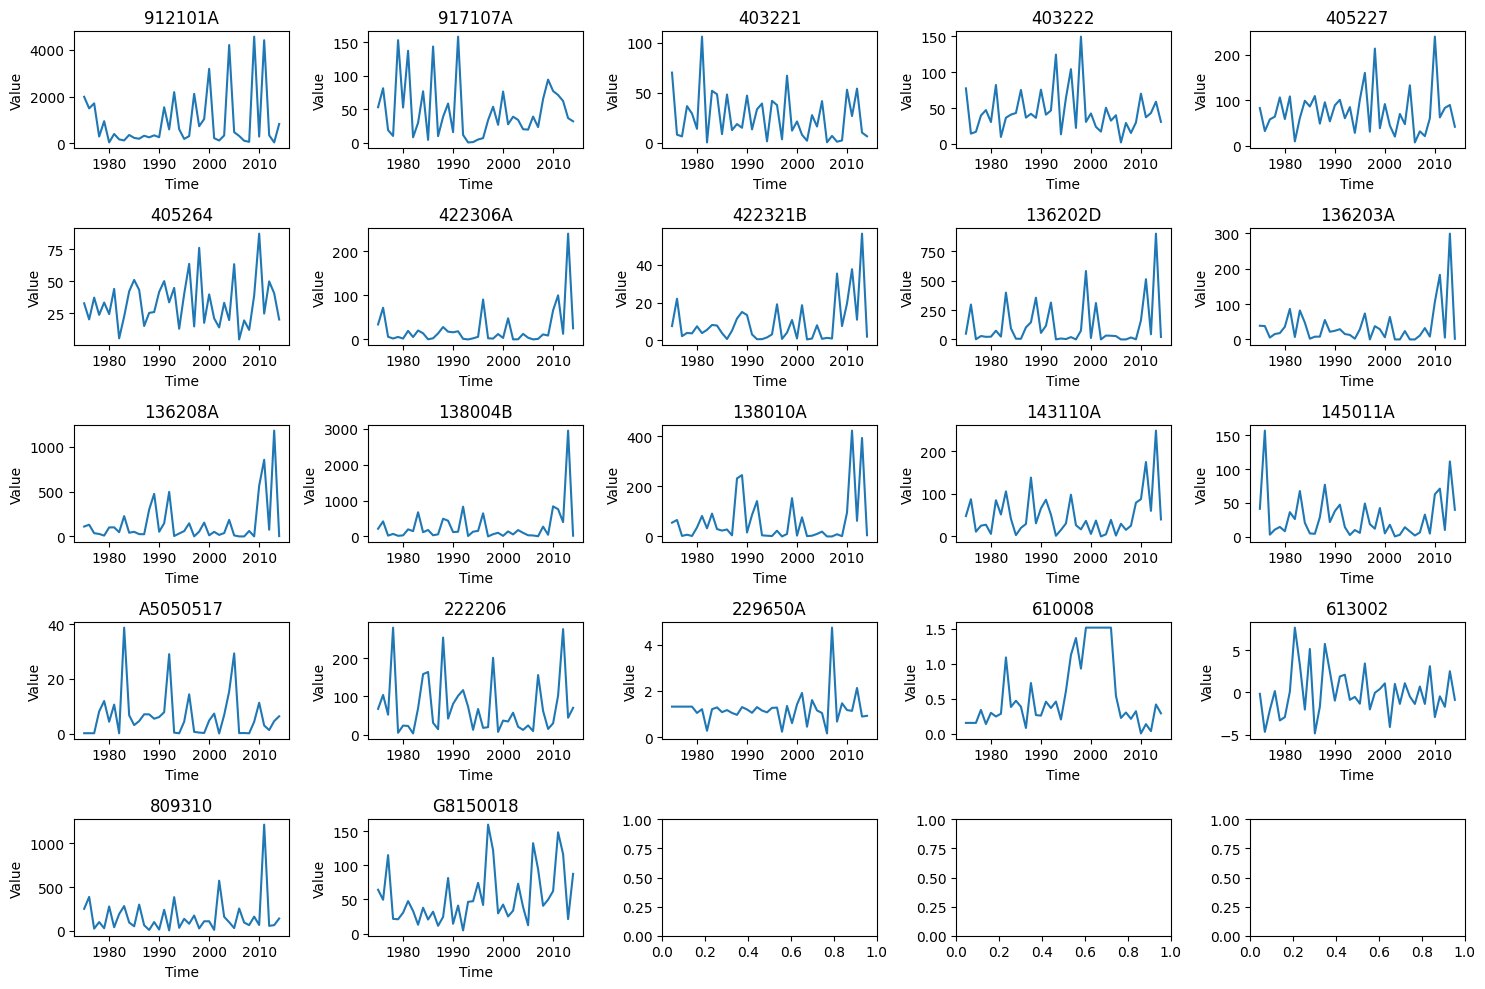

In [33]:
import matplotlib.pyplot as plt

# Assuming your time series data is stored in a DataFrame named 'df' with columns 'TimeSeries1', 'TimeSeries2', ..., 'TimeSeries22'
# Assuming the index of the DataFrame represents the time or date

# Define the number of rows and columns for subplots
num_rows = 5  # Adjust according to the layout you prefer
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Plot each time series
for i, col in enumerate(non_stationary_stations):
    ax = axes[i]
    ax.plot(AMS_nonull_detrended.index, AMS_nonull_detrended[col])
    ax.set_title(col)
    ax.set_xlabel('Time')  # Adjust if your index represents something else
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
AMS_nonull_detrended.drop(columns = non_stationary_stations, inplace=True)
AMS_nonull_detrended_stationary = AMS_nonull_detrended
AMS_nonull_detrended_stationary.head()

,912105A,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,1798.773210,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,15.138561,739.141103,...,105.706499,10.947117,541.483803,702.487402,-68.764032,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1195.999290,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,15.138561,4291.129944,...,22.691637,5.454757,400.551835,567.257944,-71.772390,27.681073,95.652281,72.701618,141.405345,27.574476
1977,2098.678698,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,...,24.233873,4.964413,282.017871,336.861270,-74.780748,15.218421,109.417702,62.479461,110.996628,42.028782
1978,374.836721,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,...,16.011819,3.990414,441.044631,287.486586,-77.789105,13.626996,107.551048,75.293037,90.595832,45.791142
1979,1026.963335,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,...,21.015838,1.491287,398.660643,381.880658,-80.797463,17.976505,174.094951,98.649600,114.492670,36.450924


In [35]:
column_names_array_stationary = AMS_nonull_detrended_stationary.columns[:].tolist()

In [36]:
AMS_nonull_detrended_stationary.shape

(40, 196)

In [37]:
AMS_nonull_detrended_stationary.head()

,912105A,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,1798.773210,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,15.138561,739.141103,...,105.706499,10.947117,541.483803,702.487402,-68.764032,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1195.999290,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,15.138561,4291.129944,...,22.691637,5.454757,400.551835,567.257944,-71.772390,27.681073,95.652281,72.701618,141.405345,27.574476
1977,2098.678698,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,...,24.233873,4.964413,282.017871,336.861270,-74.780748,15.218421,109.417702,62.479461,110.996628,42.028782
1978,374.836721,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,...,16.011819,3.990414,441.044631,287.486586,-77.789105,13.626996,107.551048,75.293037,90.595832,45.791142
1979,1026.963335,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,...,21.015838,1.491287,398.660643,381.880658,-80.797463,17.976505,174.094951,98.649600,114.492670,36.450924


In [38]:
count = 0
col_with_negatives_zeros = []
for index, row in AMS_nonull_detrended_stationary.iterrows():
    for column, value in row.items():
        if value <=0 :
            count = count+1
            col_with_negatives_zeros.append(column)
            print(f"Zero value found at position: ({index}, {column})")
print(count)
print(len(col_with_negatives_zeros))
num_unique_stations = len(set(col_with_negatives_zeros))
unique_stations = set(col_with_negatives_zeros)

print("Number of unique strings:", num_unique_stations)
print("Unique strings:", unique_stations)

Zero value found at position: (1975, 406208)
Zero value found at position: (1975, 415237)
Zero value found at position: (1975, 105102A)
Zero value found at position: (1975, 138009A)
Zero value found at position: (1975, A5040517)
Zero value found at position: (1975, 230210)
Zero value found at position: (1975, 231213)
Zero value found at position: (1975, A2390531)
Zero value found at position: (1975, 606185)
Zero value found at position: (1975, 607155)
Zero value found at position: (1975, 613146)
Zero value found at position: (1975, G8140040)
Zero value found at position: (1975, 308799)
Zero value found at position: (1976, 405205)
Zero value found at position: (1976, 405238)
Zero value found at position: (1976, 406208)
Zero value found at position: (1976, 406213)
Zero value found at position: (1976, 406214)
Zero value found at position: (1976, 407214)
Zero value found at position: (1976, 407215)
Zero value found at position: (1976, 407220)
Zero value found at position: (1976, 407230)
Ze

In [39]:
AMS_nonull_detrended_stationary.drop(columns = unique_stations, inplace=True)

In [40]:
column_names_array_stationary = AMS_nonull_detrended_stationary.columns[:].tolist()

In [41]:
AMS_nonull_detrended_stationary.shape

(40, 155)

### Quantile calculation for LP3 Distribution

In [42]:
from scipy import stats
results = []

for name in column_names_array_stationary:

  shape, loc, scale = stats.pearson3.fit(AMS_nonull_detrended_stationary[name])

  fitted_distribution = stats.pearson3(shape, loc, scale)
  quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
  flood_values = [fitted_distribution.ppf(q) for q in quantiles]

  station_dict = {
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale
    }

  for i, quantile in enumerate(quantiles):
      station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

  results.append(station_dict)

All_Station_Quantiles_lp3 = pd.DataFrame(results)

In [43]:
All_Station_Quantiles_lp3.head()

,Station,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,2.069040,783.425550,806.277574,16.469215,37.592811,76.164883,118.226935,163.702978,212.782450,529.363821
1,915011A,2.146864,55.804581,59.229013,1.292666,2.560110,5.011908,7.785486,10.853081,14.217878,36.610036
2,919003A,2.107669,1679.646081,1765.975122,27.169364,69.066854,147.766984,235.145390,330.672914,434.592226,1115.237886
3,919201A,2.012377,208.347177,203.906387,9.620991,15.772471,26.562291,38.031392,50.237049,63.262023,145.472244
4,919309A,1.709401,1115.653557,959.657429,48.790607,105.278332,187.234865,264.454371,340.737673,417.908202,857.160464


### Quantile calculation for Gumbel Distribution

In [44]:
from scipy.stats import gumbel_r

results = []

for name in column_names_array_stationary:
    loc, scale = gumbel_r.fit(AMS_nonull_detrended_stationary[name])

    fitted_distribution = gumbel_r(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_distribution.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gumbel = pd.DataFrame(results)


In [45]:
All_Station_Quantiles_gumbel.head()

,Station,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,437.045789,484.278944,-223.537148,-94.299596,33.141438,126.944093,206.584706,278.863695,614.540279
1,915011A,32.120426,32.756683,-12.561479,-3.819836,4.800290,11.145112,16.532012,21.420971,44.126174
2,919003A,960.560135,1028.210731,-441.975477,-167.581061,102.999024,302.158823,471.250076,624.711283,1337.412653
3,919201A,136.863443,130.104224,-40.605826,-5.885441,28.352299,53.552902,74.948795,94.366946,184.548322
4,919309A,716.701501,618.948031,-127.577429,37.598715,200.478761,320.366213,422.153420,514.531869,943.553952


In [46]:
All_Station_Quantiles_gumbel.to_csv('streamflow_quantiles.csv')

In [47]:
All_Station_Quantiles_gumbel.shape

(155, 10)

### Quantile calculation for GEV Distribution

In [48]:
from scipy.stats import genextreme

results = []

for name in column_names_array_stationary:
    shape, loc, scale = genextreme.fit(AMS_nonull_detrended_stationary[name])

    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [genextreme.ppf(q, shape, loc, scale) for q in quantiles]

    station_dict = {
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gev = pd.DataFrame(results)


In [49]:
All_Station_Quantiles_gev.head()

,Station,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,-5.183179,5.428429,7.135627,4.052910,4.056407,4.069996,4.101562,4.168584,4.305004,13.253398
1,915011A,-0.416131,25.357935,23.351684,1.052327,4.788546,8.902321,12.231436,15.276372,18.226138,34.603790
2,919003A,-6.071808,5.280006,8.470556,3.885296,3.886727,3.893759,3.913522,3.962515,4.076931,16.799249
3,919201A,-0.213025,122.537909,116.805338,-15.730531,8.255726,33.282169,52.620184,69.676682,85.682382,167.064186
4,919309A,-5.779993,15.368448,8.163140,13.956670,13.958626,13.967523,13.991016,14.046369,14.169938,25.703968


### Gumbel Distribution Fitting and GOF test

In [50]:
import pandas as pd
from scipy.stats import gumbel_r, kstest

# Placeholder DataFrame for example
# AMS_nonull_detrended_stationary = ...

results = []
significant_count = 0
significance_level = 0.05

for name in column_names_array_stationary:
    data = AMS_nonull_detrended_stationary[name]
    loc, scale = gumbel_r.fit(data)

    # K-S test
    statistic, p_value = kstest(data, 'gumbel_r', args=(loc, scale))

    # Add results to the list
    results.append({
        'Station': name,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1

results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Gumbel distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Gumbel distribution within a significance level of 0.05: 143


### Log Pearson 3 Fitting and GOF test

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm, kstest

results = []
significant_count = 0
significance_level = 0.05

def fit_log_pearson3(data):
    log_data = np.log(data)
    shape = log_data.skew()
    scale = log_data.std()
    loc = log_data.mean() - (scale**2 / shape) if shape != 0 else log_data.mean()
    return shape, loc, scale

for name in column_names_array_stationary:
    data = AMS_nonull_detrended_stationary[name]
    shape, loc, scale = fit_log_pearson3(data)

    # Compute parameters for the lognormal distribution based on the fitted log-pearson III parameters
    sigma = scale  # Standard deviation of log-data
    mu = loc       # Mean of log-data

    # K-S test against the lognormal distribution
    statistic, p_value = kstest(data, 'lognorm', args=(sigma, 0, np.exp(mu)))

    # Add results to the list
    results.append({
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    # Count how many pass the significance level
    if p_value > significance_level:
        significant_count += 1

# Create DataFrame of results
results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Log-Pearson Type III distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Log-Pearson Type III distribution within a significance level of 0.05: 2


### GEV fitting and GOF Test

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme, kstest

# Placeholder DataFrame for example
# AMS_nonull_detrended_stationary = ...

results = []
significant_count = 0
significance_level = 0.05

def fit_gev(data):
    # Remove zeros or negative values (if any)
    data = data[data > 0]
    shape, loc, scale = genextreme.fit(data)
    return shape, loc, scale

for name in column_names_array_stationary:
    data = AMS_nonull_detrended_stationary[name]
    shape, loc, scale = fit_gev(data)

    # K-S test against the Generalized Extreme Value Distribution
    statistic, p_value = kstest(data, 'genextreme', args=(shape, loc, scale))

    # Add results to the list
    results.append({
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    # Count how many pass the significance level
    if p_value > significance_level:
        significant_count += 1

# Create DataFrame of results
results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Generalized Extreme Value Distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Generalized Extreme Value Distribution within a significance level of 0.05: 138


In [53]:
len(column_names_array_stationary)

155

In [54]:
AMS_nonull_detrended_stationary.shape

(40, 155)

In [55]:
AMS_nonull_detrended_stationary.head()


,912105A,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,...,304497,304499,305202,307473,308145,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,1798.773210,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,15.138561,739.141103,...,76.827749,105.706499,10.947117,541.483803,702.487402,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1195.999290,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,15.138561,4291.129944,...,26.296012,22.691637,5.454757,400.551835,567.257944,27.681073,95.652281,72.701618,141.405345,27.574476
1977,2098.678698,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,...,23.579710,24.233873,4.964413,282.017871,336.861270,15.218421,109.417702,62.479461,110.996628,42.028782
1978,374.836721,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,...,28.967407,16.011819,3.990414,441.044631,287.486586,13.626996,107.551048,75.293037,90.595832,45.791142
1979,1026.963335,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,...,21.943378,21.015838,1.491287,398.660643,381.880658,17.976505,174.094951,98.649600,114.492670,36.450924


In [56]:
AMS_nonull_detrended_stationary.tail()

,912105A,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,...,304497,304499,305202,307473,308145,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
2010,347.665599,62.376916,2575.411758,251.474085,2231.548218,62.874019,469.093063,21.776944,43.061877,1673.878176,...,25.086761,25.442430,5.958943,310.956343,225.843462,20.191074,163.958441,71.547806,80.181200,67.712993
2011,2612.425410,49.551303,2916.717444,226.168691,3235.245498,158.783706,645.527119,52.095847,41.122538,2491.361370,...,34.230568,49.404198,10.606298,313.705168,365.729141,21.213290,313.892667,153.450407,89.032301,105.503723
2012,243.803995,118.449473,745.627172,135.646123,700.777922,48.878622,414.902437,65.460924,6.071061,520.805695,...,26.812907,36.626733,3.331402,245.503058,211.675729,20.836672,100.766600,63.021356,88.884269,25.145788
2013,95.824271,0.627342,3928.910040,417.969547,1915.705332,170.262799,761.219665,97.054703,1.730683,1310.767074,...,41.328671,46.160468,5.426701,347.979254,330.014092,26.691612,144.125235,81.943226,134.995664,97.283521
2014,988.736728,12.751423,2433.896460,754.904891,408.736967,105.371779,903.988427,62.768580,0.710979,744.928103,...,58.056573,102.076314,1.311323,433.476392,301.603394,33.300829,169.298685,51.965987,166.098474,95.081220


In [57]:
AMS_nonull_detrended_stationary.to_csv('AMS_nonull_detrended_stationary.csv')

In [58]:
column_names_array_stationary

['912105A',
 '915011A',
 '919003A',
 '919201A',
 '919309A',
 '922101B',
 '925001A',
 '926002A',
 'G9030124',
 'G9030250',
 'G9070142',
 'A0020101',
 'A0030501',
 '401009',
 '401012',
 '401203',
 '401208',
 '401210',
 '401212',
 '401216',
 '401217',
 '402204',
 '402206',
 '402213',
 '402217',
 '403209A',
 '403213A',
 '403214',
 '403217',
 '403226',
 '403232',
 '404207',
 '405209',
 '405215',
 '405217',
 '405218',
 '405219',
 '405226',
 '405245',
 '405251',
 '405263',
 '405274',
 '407253',
 '410057',
 '410705',
 '410730',
 '410731',
 '410761',
 '412028',
 '412050',
 '412066',
 '416003',
 '416008',
 '418005',
 '418014',
 '419005',
 '422202B',
 '422313B',
 '422334A',
 '422394A',
 '424002',
 '424201A',
 '102101A',
 '104001A',
 '105101A',
 '105105A',
 '107001B',
 '108002A',
 '108003A',
 '112002A',
 '112102A',
 '113004A',
 '116006B',
 '116010A',
 '116011A',
 '116012A',
 '116013A',
 '116015A',
 '121001A',
 '122004A',
 '126003A',
 '137101A',
 '137201A',
 '138113A',
 '143009A',
 '143303A',
 '145